In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
# set Random seeds for Reproducibility
torch.manual_seed(42)

In [4]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [6]:
df = pd.read_csv('/content/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0.0,7.0,0.0,50.0,205.0,196.0,213.0,165.0,0.0,0.0
1,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,142.0,142.0,142.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
3,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0,0,0,0,0,0,0,0,0,...,213.0,203.0,174.0,151.0,188.0,10.0,0.0,0.0,0.0,0.0


In [7]:
df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3295,8,0,0,0,0,0,0,0,0,0,...,144.0,130.0,110.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0
3296,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3297,6,0,0,0,0,0,0,0,2,0,...,67.0,71.0,81.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
3298,6,0,0,0,0,0,0,0,0,17,...,126.0,142.0,188.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0
3299,2,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Columns: 785 entries, label to pixel784
dtypes: float64(263), int64(522)
memory usage: 19.8 MB


In [10]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,3300.000000,3300.0,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,...,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000
mean,4.488182,0.0,0.001818,0.027273,0.091515,0.226667,0.400606,0.815152,2.028485,6.012121,...,35.396787,24.317066,17.480145,19.425887,24.843589,19.753259,9.475599,2.916641,0.841467,0.049712
std,2.852573,0.0,0.042608,0.586693,2.155684,3.847678,5.762039,9.051422,13.348743,24.304210,...,57.992617,49.743802,42.959955,45.872528,54.041090,47.386240,32.098208,18.067071,9.206052,1.846591
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.000000,11.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,0.0,1.000000,32.000000,105.000000,162.000000,202.000000,211.000000,206.000000,217.000000,...,255.000000,239.000000,255.000000,255.000000,254.000000,255.000000,248.000000,255.000000,188.000000,85.000000


In [11]:
df.shape

(3300, 785)

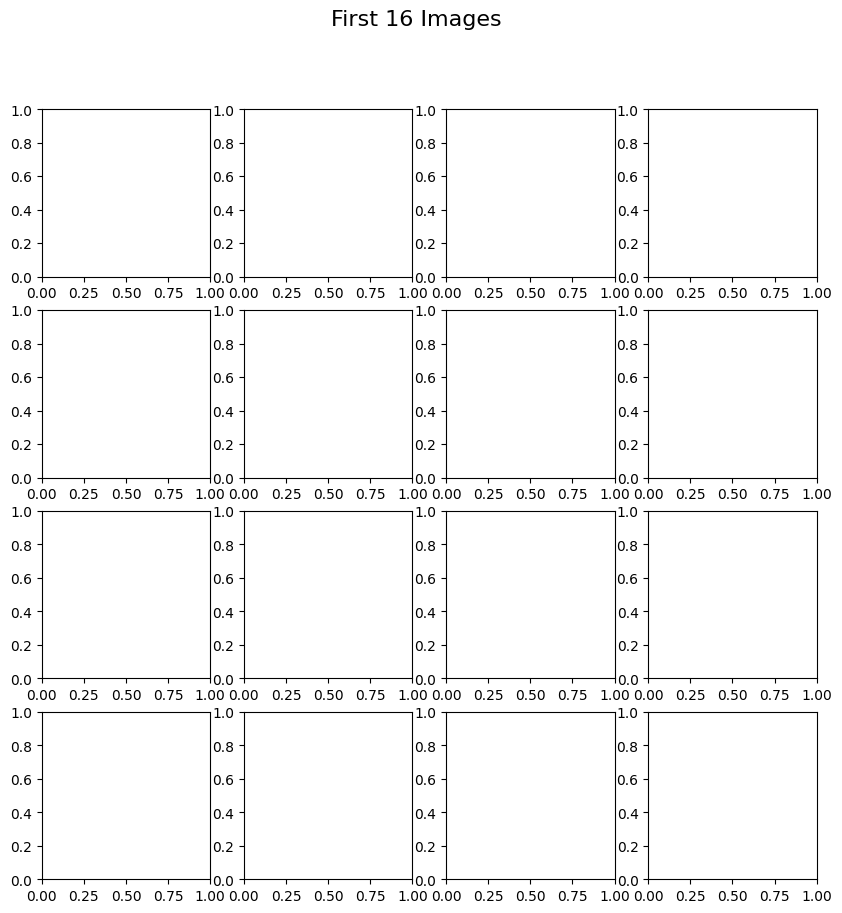

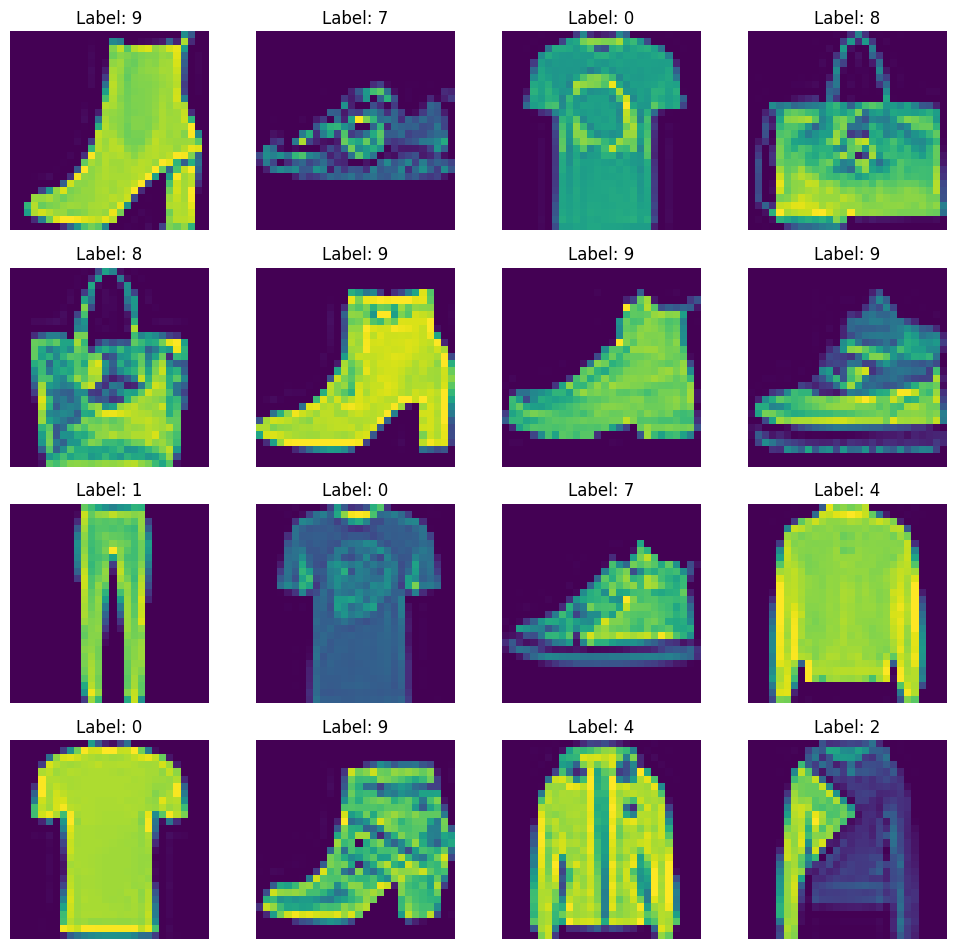

In [12]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

fig, axes = plt.subplots(4, 4, figsize=(10,10))

# Plot the first 16 images from the Dataset:-
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [13]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

In [22]:
class CustomDataset(Dataset):
  def __init__(self, features, labels):

    # Convert to PyTorch tensors
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [23]:
train_dataset = CustomDataset(X_train, y_train)

In [24]:
test_dataset = CustomDataset(X_test, y_test)

In [25]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [26]:
len(train_loader)

83

In [28]:
class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)

    )

  def forward(self, x):

    return self.model(x)


In [29]:
learning_rate = 0.1
epochs = 100

In [30]:
# instatiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)   ## Model move to GPU

# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.6270991829504449
Epoch: 2 , Loss: 0.9283026622002384
Epoch: 3 , Loss: 0.7757641044725855
Epoch: 4 , Loss: 0.6970971495990294
Epoch: 5 , Loss: 0.627041240413505
Epoch: 6 , Loss: 0.578894033130393
Epoch: 7 , Loss: 0.5497334335582802
Epoch: 8 , Loss: 0.5142801071865013
Epoch: 9 , Loss: 0.49833753094615707
Epoch: 10 , Loss: 0.4790617995053889
Epoch: 11 , Loss: 0.459135284445372
Epoch: 12 , Loss: 0.4393522468316986
Epoch: 13 , Loss: 0.4079890211662614
Epoch: 14 , Loss: 0.40433475913771666
Epoch: 15 , Loss: 0.3665918618081564
Epoch: 16 , Loss: 0.365760969020516
Epoch: 17 , Loss: 0.35063465137079536
Epoch: 18 , Loss: 0.33554845060928756
Epoch: 19 , Loss: 0.334246050880616
Epoch: 20 , Loss: 0.30106245340353033
Epoch: 21 , Loss: 0.3144893969397947
Epoch: 22 , Loss: 0.3034753591181284
Epoch: 23 , Loss: 0.2801411412207477
Epoch: 24 , Loss: 0.2855917751250497
Epoch: 25 , Loss: 0.2575283401522292
Epoch: 26 , Loss: 0.2498599255839026
Epoch: 27 , Loss: 0.2471228186265532
Epoch: 28 

In [32]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [33]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to GPU:--

    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8378787878787879


In [ ]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.99875


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [ ]:
len(train_loader)

In [ ]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

In [ ]:
model.eval()

In [ ]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

In [ ]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)